<a href="https://colab.research.google.com/github/alfianfian/text_clustering/blob/main/Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
R.version

               _                                          
platform       x86_64-pc-linux-gnu                        
arch           x86_64                                     
os             linux-gnu                                  
system         x86_64, linux-gnu                          
status         Patched                                    
major          4                                          
minor          2.2                                        
year           2022                                       
month          11                                         
day            10                                         
svn rev        83330                                      
language       R                                          
version.string R version 4.2.2 Patched (2022-11-10 r83330)
nickname       Innocent and Trusting                      

In [6]:
# Load library
install.packages("dplyr")
install.packages("SnowballC")
install.packages("tidytext")
install.packages("tm")
install.packages("caret")
install.packages("stringr")
library(dplyr)
library(SnowballC)
library(tidytext)
library(tm)
library(caret)
library(stringr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP

Loading required package: ggplot2



In [8]:
getwd()

[1] "/content"

In [10]:
df <- read.csv("/content/test.csv")
head(df,3)

,ID,TITLE,ABSTRACT
,<int>,<chr>,<chr>
1,20973,Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization,"We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties."
2,20974,Laboratory mid-IR spectra of equilibrated and igneous meteorites. Searching for observables of planetesimal debris,"Meteorites contain minerals from Solar System asteroids with different properties (like size, presence of water, core formation). We provide new mid-IR transmission spectra of powdered meteorites to obtain templates of how mid-IR spectra of asteroidal debris would look like. This is essential for interpreting mid-IR spectra of past and future space observatories, like the James Webb Space Telescope. We show that the transmission spectra of wet and dry chondrites, carbonaceous and ordinary chondrites and achondrite and chondrite meteorites are distinctly different in a way one can distinguish in astronomical mid-IR spectra. The two observables that spectroscopically separate the different meteorites groups (and thus the different types of parent bodies) are the pyroxene-olivine feature strength ratio and the peak shift of the olivine spectral features due to an increase in the iron concentration of the olivine."
3,20975,Case For Static AMSDU Aggregation in WLANs,"Frame aggregation is a mechanism by which multiple frames are combined into a single transmission unit over the air. Frames aggregated at the AMSDU level use a common CRC check to enforce integrity. For longer aggregated AMSDU frames, the packet error rate increases significantly for the same bit error rate. Hence, multiple studies have proposed doing AMSDU aggregation adaptively based on the error rate. This study evaluates if there is a \emph{practical} advantage in doing adaptive AMSDU aggregation based on the link bit error rate. Evaluations on a model show that instead of implementing a complex adaptive AMSDU frame aggregation mechanism which impact queuing and other implementation aspects, it is easier to influence packet error rate with traditional mechanisms while keeping the AMSDU aggregation logic simple."


In [11]:
df$merge <- paste(df$TITLE, df$ABSTRACT)
head(df, 3)

,ID,TITLE,ABSTRACT,merge
,<int>,<chr>,<chr>,<chr>
1,20973,Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization,"We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties.","Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties."
2,20974,Laboratory mid-IR spectra of equilibrated and igneous meteorites. Searching for observables of planetesimal debris,"Meteorites contain minerals from Solar System asteroids with different properties (like size, presence of water, core formation). We provide new mid-IR transmission spectra of powdered meteorites to obtain templates of how mid-IR spectra of asteroidal debris would look like. This is essential for interpreting mid-IR spectra of past and future space observatories, like the James Webb Space Telescope. We show that the transmission spectra of wet and dry chondrites, carbonaceous and ordinary chondrites and achondrite and chondrite meteorites are distinctly different in a way one can distinguish in astronomical mid-IR spectra. The two observables that spectroscopically separate the different meteorites groups (and thus the different types of parent bodies) are the pyroxene-olivine feature strength ratio and the peak shift of the olivine spectral features due to an increase in the iron concentration of the olivine.","Laboratory mid-IR spectra of equilibrated and igneous meteorites. Searching for observables of planetesimal debris Meteorites contain minerals from Solar System asteroids with different properties (like size, presence of water, core formation). We provide new mid-IR transmission spectra of powdered meteorites to obtain templates of how mid-IR spectra of asteroidal debris would look like. This is essential for interpreting mid-IR spectra of past and future space observatories, like the James Webb Space Telescope. We show that the transmission spectra of wet and dry chondrites, carbonaceous and ordinary chondrites and achondrite and chondrite meteorites are distinctly different in a way one can distinguish in astronomical mid-IR spectra. The two observables that spectroscopically separate the different meteorites groups (and thus the different types of parent bodies) are the pyroxene-olivine feature strength ratio and the peak shift of the olivine spectral features due to an increase in the iron concentration of the olivine."
3,20975,Case For Static AMSDU Aggregation in WLANs,"Frame aggregation is a mechanism by which multiple frames are combined into a single transmission unit over the air. Frames aggregated at the AMSDU level use a common CRC check to enforce integrity. For longer aggregated AMSDU frames, the packet error rate increases sig

In [12]:
df <- df[, -c(2,3)]
head(df, 1)

,ID,merge
,<int>,<chr>
1,20973,"Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties."


In [13]:
# pre processing
prepo <- function(d){
  d <- tolower(d)
  d <- gsub("[[:punct:]]", "", d)
  d <- gsub("[[:digit:]]", "", d)
  d <- gsub("[^[:alnum:]]", "", d)
  d <- str_squish(d)
  return(d=d)
}

In [23]:
# pre processing lanjutan
adverpro <- function(d){
  d <- as_tibble(d)
  result <- d %>%
    unnest_tokens(output = word, merge, token = "words") %>%
    mutate(stem=wordStem(word)) %>%
    anti_join(stop_words) %>%
    count(ID, word) %>%
    bind_tf_idf(word, ID, n) %>%
    cast_dtm(ID, word, tf_idf) %>%
    removeSparseTerms(sparse = 0.95)
  result <- data.frame(as.matrix(result))
  result$ID <- as.numeric(row.names(result))
  return(result <- result)
}

In [24]:
df_dtm <- adverpro(df)
df_dtm

Joining, by = "word"


,algorithm,data,estimation,form,matrix,model,observed,previous,properties,due,⋯,range,investigate,called,technique,type,develop,probability,art,datasets,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20973,0.03319049,0.02275448,0.09801474,0.04462114,0.2478922,0.042844220,0.04585212,0.04677746,0.03670033,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20973
20974,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.02502295,0.02746191,⋯,0,0,0,0,0,0,0,0,0,20974
20975,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.015868230,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20975
20976,0.00000000,0.00832481,0.00000000,0.00000000,0.0000000,0.000000000,0.01677517,0.00000000,0.01342695,0.02947132,⋯,0,0,0,0,0,0,0,0,0,20976
20977,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20977
20978,0.00000000,0.02007748,0.04324180,0.00000000,0.0000000,0.056705586,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20978
20979,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.014945658,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20979
20980,0.00000000,0.10059875,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20980
20981,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,20981


In [26]:
# scale kecuali ID
# scale(df_dtm[,-139])
df_dtm <- data.frame(scale(df_dtm))
df_dtm

,algorithm,data,estimation,form,matrix,model,observed,previous,properties,due,⋯,range,investigate,called,technique,type,develop,probability,art,datasets,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20973,1.3499659,0.78951504,6.0436760,3.4623758,12.3388692,2.00457640,4.472199,4.8670295,2.4107417,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.731762
20974,-0.3006869,-0.42524727,-0.1934697,-0.2228852,-0.1750026,-0.45702599,-0.225525,-0.2244089,1.5519810,2.5569419,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.731376
20975,-0.3006869,-0.42524727,-0.1934697,-0.2228852,-0.1750026,0.45467860,-0.225525,-0.2244089,-0.2882206,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.730991
20976,-0.3006869,0.01917796,-0.1934697,-0.2228852,-0.1750026,-0.45702599,1.493154,-0.2244089,0.6992046,2.7633686,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.730606
20977,-0.3006869,-0.42524727,-0.1934697,-0.2228852,-0.1750026,-0.45702599,-0.225525,-0.2244089,-0.2882206,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.730220
20978,-0.3006869,0.64660183,2.5582123,-0.2228852,-0.1750026,2.80097718,-0.225525,-0.2244089,-0.2882206,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.729835
20979,-0.3006869,-0.42524727,-0.1934697,-0.2228852,-0.1750026,0.40167252,-0.225525,-0.2244089,-0.2882206,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.729450
20980,-0.3006869,4.94528085,-0.1934697,-0.2228852,-0.1750026,-0.45702599,-0.225525,-0.2244089,-0.2882206,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.729064
20981,-0.3006869,-0.42524727,-0.1934697,-0.2228852,-0.1750026,-0.45702599,-0.225525,-0.2244089,-0.2882206,-0.2642224,⋯,-0.2176836,-0.2221109,-0.2253053,-0.1984353,-0.2050597,-0.2155641,-0.186827,-0.24356,-0.2179383,-1.728679


In [30]:
# PCA dua komponen
pca_model <- prcomp(df_dtm, center=F, scale=F, rank=2)

In [35]:
pca_model$rotation

,PC1,PC2
algorithm,0.078902512,-0.152775320
data,0.159271966,-0.047279514
estimation,0.041008538,-0.194175877
form,-0.047495503,0.009997928
matrix,-0.003077733,-0.081631263
model,0.082825125,-0.091402820
observed,-0.022163242,-0.053582316
previous,0.028016235,0.030775355
properties,-0.049566156,-0.010296111
due,-0.009707997,-0.003365213


In [37]:
matrix_component <- as.matrix(pca_model$rotation)
matrix_df <- as.matrix(df_dtm)

In [49]:
newdata <- data.frame(matrix_df %*% matrix_component)

In [50]:
kmeans(newdata,10)

K-means clustering with 10 clusters of sizes 961, 2033, 258, 416, 781, 392, 672, 1473, 1317, 686

Cluster means:
          PC1         PC2
1   0.0568682 -1.85711791
2  -1.5457464  0.59527580
3   5.2135339  3.43049076
4   1.7842477 -3.27610922
5   1.7686990 -0.71450887
6   4.0255726  0.26280976
7   2.1130923  1.60316907
8  -1.1803244 -0.54579560
9   0.1042260  0.01767481
10 -2.5911238  1.76479448

Clustering vector:
20973 20974 20975 20976 20977 20978 20979 20980 20981 20982 20983 20984 20985 
    1     2     1     2     9     4     8     6     9     8     8     5     2 
20986 20987 20988 20989 20990 20991 20992 20993 20994 20995 20996 20997 20998 
    5     5     8     9     9     7     8     8     2     9     9     8     5 
20999 21000 21001 21002 21003 21004 21005 21006 21007 21008 21009 21010 21011 
    7     8     2     9     9     1     4     1     2     1     2     1    10 
21012 21013 21014 21015 21016 21017 21018 21019 21020 21021 21022 21023 21024 
   10     1     2     5     

In [42]:
# Data Clustering
install.packages("cluster")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’




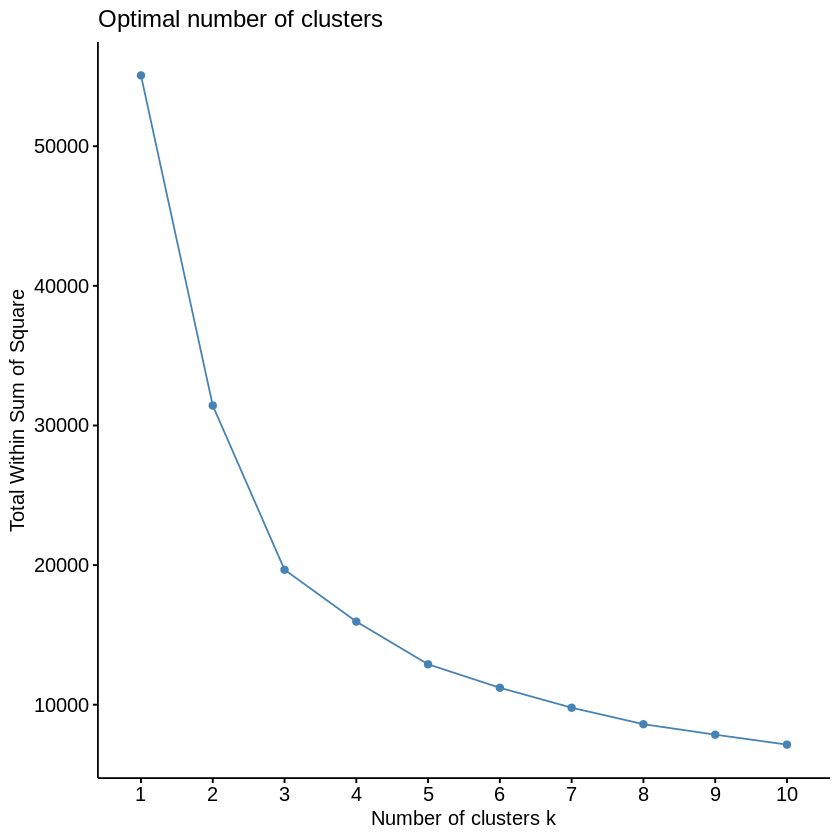

In [51]:
library(cluster)
library(factoextra)
fviz_nbclust(newdata, kmeans, method = "wss")

In [ ]:
# Berdasarkan elbow method, didapatkan penurunan kmeans paling drastis pada 1 ke 2, 2 ke 3, dan 3 ke 4. Diputuskan membentuk 4 cluster

In [52]:
model_klaster <- kmeans(newdata, 4)

In [53]:
newdata$kelompok <- model_klaster$cluster

In [54]:
df$kelompok <- model_klaster$cluster

In [55]:
df[df$kelompok == 1,]

,ID,merge,kelompok
,<int>,<chr>,<int>
1,20973,"Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties.",1
3,20975,"Case For Static AMSDU Aggregation in WLANs Frame aggregation is a mechanism by which multiple frames are combined into a single transmission unit over the air. Frames aggregated at the AMSDU level use a common CRC check to enforce integrity. For longer aggregated AMSDU frames, the packet error rate increases significantly for the same bit error rate. Hence, multiple studies have proposed doing AMSDU aggregation adaptively based on the error rate. This study evaluates if there is a \emph{practical} advantage in doing adaptive AMSDU aggregation based on the link bit error rate. Evaluations on a model show that instead of implementing a complex adaptive AMSDU frame aggregation mechanism which impact queuing and other implementation aspects, it is easier to influence packet error rate with traditional mechanisms while keeping the AMSDU aggregation logic simple.",1
5,20977,"Witness-Functions versus Interpretation-Functions for Secrecy in Cryptographic Protocols: What to Choose? Proving that a cryptographic protocol is correct for secrecy is a hard task. One of the strongest strategies to reach this goal is to show that it is increasing, which means that the security level of every single atomic message exchanged in the protocol, safely evaluated, never deceases. Recently, two families of functions have been proposed to measure the security level of atomic messages. The first one is the family of interpretation-functions. The second is the family of witness-functions. In this paper, we show that the witness-functions are more efficient than interpretation-functions. We give a detailed analysis of an ad-hoc protocol on which the witness-functions succeed in proving its correctness for secrecy while the interpretation-functions fail to do so.",1
7,20979,"Dissecting the multivariate extremal index and tail dependence A central issue in the theory of extreme values focuses on suitable conditions such that the well-known results for the limiting distributions of the maximum of i.i.d. sequences can be applied to stationary ones. In this context, the extremal index appears as a key parameter to capture the effect of temporal dependence on the limiting distribution of the maxima. The multivariate extremal index corresponds to a generalization of this concept to a multivariate context and affects the tail dependence structure within the marginal sequences and between them. As it is a function, the inference becomes more difficult, and it is therefore important to obtain characterizations, namely bounds based on the marginal dependence that are easier to estimate. In this work we present two decompositions that emphasize different types of information contained in the multivariate extremal index, an upper limit better than those found in the literature and we analyze its role in dependence on the limiting model of the componentwise maxima of a stationary sequence. We will illustrate the results with examples of recognized interest in applications.",1
9,20981,"Natural Language Does Not Emerge 'Naturally' in Multi-Agent Dialog A number of recent works have proposed techniques for end-to-end learning of communication protocols among cooper